In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, fancy_legend, markers, load_mpl_presets
import numpy as np
import math as m
import vice
import sys
load_mpl_presets()
print(sys.version_info)
sys.path.append("..")
import src

/var/home/johnson.7419.local/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=9, micro=6, releaselevel='final', serial=0)


In [24]:
# path = "/Volumes/Elements/bimodality-outputs/clumpy-bursts/post-process"
# names = [
#     "%s/expifr_control" % (path),
#     "%s/expifr_onset2_dur1_fac10" % (path)
# ]
path = "../outputs/clumpy-bursts/post-process"
names = [
    "%s/gaussian_burst_test" % (path)
]
outputs = [vice.output(_) for _ in names]
for out in outputs:
    extra = np.genfromtxt("%s_analogdata.out" % (out.name))
    out.stars["abszfinal"] = [abs(row[-1]) for row in extra[:out.stars.size[0]]]

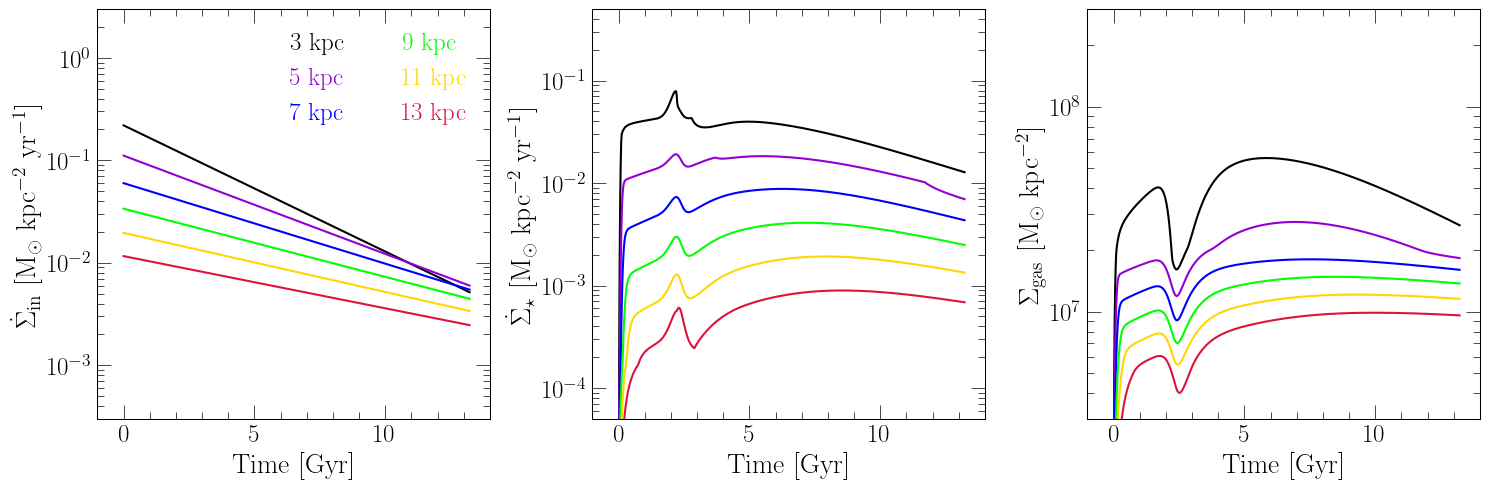

In [26]:
fig = plt.figure(figsize = (15, 5))
axes = []
ylabels = [
    r"$\dot{\Sigma}_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\Sigma_\text{gas}$ [M$_\odot$ kpc$^{-2}$]"
]
ylim = [[3.e-4, 3], [5.e-5, 5.e-1], [3.e6, 3.e8]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlabel("Time [Gyr]")
    axes[i].set_ylabel(ylabels[i])
    axes[i].set_yscale("log")
    axes[i].set_ylim(ylim[i])
    axes[i].set_xlim([-1, 14])
    
out = outputs[0]
zonewidth = 0.1
radii = [3, 5, 7, 9, 11, 13]
zones = ["zone%d" % (int(_ / zonewidth)) for _ in radii]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]

for i in range(len(zones)):
    area = m.pi * ((radii[i] + zonewidth)**2 - radii[i]**2)
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d kpc" % (radii[i])
    }
    xvals = out.zones[zones[i]].history["time"]
    yvals = out.zones[zones[i]].history["ifr"]
    yvals = [_ / area for _ in yvals]
    axes[0].plot(xvals, yvals, **kwargs)
    yvals = out.zones[zones[i]].history["sfr"]
    yvals = [_ / area for _ in yvals]
    axes[1].plot(xvals, yvals, **kwargs)
    yvals = out.zones[zones[i]].history["mgas"]
    yvals = [_ / area for _ in yvals]
    axes[2].plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 2,
    "handlelength": 0
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)
    
plt.tight_layout()
plt.show()

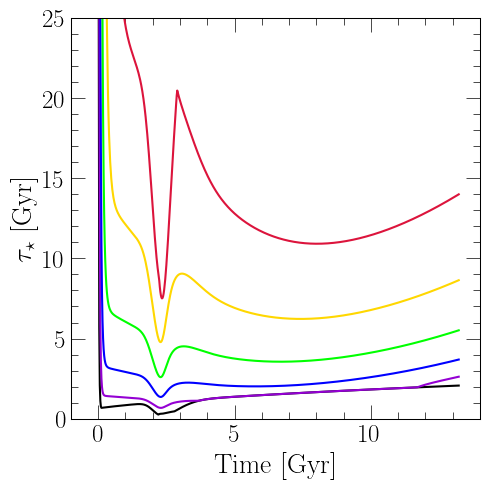

In [27]:
fig = plt.figure(figsize = (5 * len(outputs), 5))
axes = []
for i in range(len(outputs)):
    axes.append(fig.add_subplot(111 + 10 * (len(outputs) - 1) + i))
    axes[i].set_xlabel("Time [Gyr]")
    axes[i].set_ylabel(r"$\tau_\star$ [Gyr]")
    axes[i].set_xlim([-1, 14])
    axes[i].set_ylim([0, 25])
    
radii = [3, 5, 7, 9, 11, 13]
zones = ["zone%d" % (int(_ / zonewidth)) for _ in radii]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]

for out in outputs:
    for i in range(len(zones)):
        kwargs = {
            "c": named_colors()[colors[i]],
            "label": "%d kpc" % (radii[i])
        }
        xvals = out.zones[zones[i]].history["time"]
        yvals = [1.e-9 * a / b for a, b in zip(
            out.zones[zones[i]].history["mgas"],
            out.zones[zones[i]].history["sfr"])]
        axes[outputs.index(out)].plot(xvals, yvals, **kwargs)
        
plt.tight_layout()
plt.show()

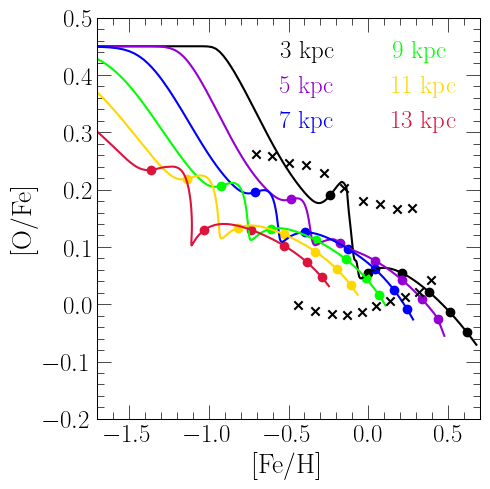

In [29]:
fig = plt.figure(figsize = (5 * len(outputs), 5))
axes = []
for i in range(len(outputs)):
    axes.append(fig.add_subplot(111 + 10 * (len(outputs) - 1) + i))
    axes[i].set_xlabel("[Fe/H]")
    axes[i].set_ylabel("[O/Fe]")
    axes[i].set_xlim([-1.7, 0.7])
    axes[i].set_ylim([-0.2, 0.5])

zonewidth = 0.1
radii = [3, 5, 7, 9, 11, 13]
zones = ["zone%d" % (int(_ / zonewidth)) for _ in radii]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]
times = [2, 4, 6, 8, 10, 12]

for out in outputs:
    for i in range(len(zones)):
        kwargs = {
            "c": named_colors()[colors[i]]
        }
        for j in range(len(times)):
            idx = out.zones[zones[i]].history["time"].index(times[j])
            xval = out.zones[zones[i]].history["[fe/h]"][idx]
            yval = out.zones[zones[i]].history["[o/fe]"][idx]
            axes[outputs.index(out)].scatter(xval, yval, **kwargs)
        kwargs["label"] = "%d kpc" % (radii[i])
        xvals = out.zones[zones[i]].history["[fe/h]"]
        yvals = out.zones[zones[i]].history["[o/fe]"]
        axes[outputs.index(out)].plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 2,
    "handlelength": 0
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)

higha, lowa = src.data.griffith2021()
kwargs = {
    "c": named_colors()["black"],
    "marker": markers()['x'],
    "zorder": 10
}
for ax in axes:
    ax.scatter(higha["[fe/h]"], higha["[mg/fe]"], **kwargs)
    ax.scatter(lowa["[fe/h]"], lowa["[mg/fe]"], **kwargs)

plt.tight_layout()
plt.show()

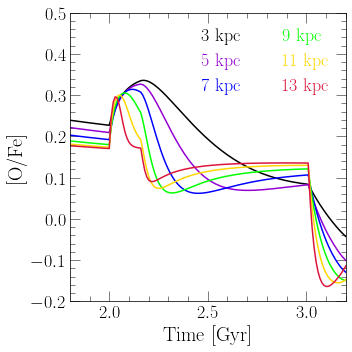

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time [Gyr]")
ax.set_ylabel("[O/Fe]")
ax.set_xlim([1.8, 3.2])
ax.set_ylim([-0.2, 0.5])

zonewidth = 0.1
radii = [3, 5, 7, 9, 11, 13]
zones = ["zone%d" % (int(_ / zonewidth)) for _ in radii]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]

for i in range(len(zones)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d kpc" % (radii[i])
    }
    xvals = out.zones[zones[i]].history["time"]
    yvals = out.zones[zones[i]].history["[o/fe]"]
    ax.plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 2,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

In [40]:
class tophat_smooth:
    
    def __init__(self, x1, x2, y1, y2, dx):
        self.x1 = float(x1)
        self.x2 = float(x2)
        self.y1 = float(y1)
        self.y2 = float(y2)
        self.dx = float(dx)
        
    def __call__(self, x):
        if x + self.dx <= self.x1 or x - self.dx >= self.x2:
            return self.y1
        elif x - self.dx >= self.x1 and x + self.dx <= self.x2:
            return self.y2
        elif x - self.dx < self.x1 and x + self.dx > self.x2:
            return 1 / (2 * self.dx) * (
                self.x1 * (self.y1 - self.y2) +
                self.x2 * (self.y2 - self.y1) +
                2 * self.dx * self.y1
            )
        elif x - self.dx < self.x1 and self.x1 < x + self.dx < self.x2:
            return 1 / (2 * self.dx) * (
                self.x1 * (self.y1 - self.y2) +
                self.dx * (self.y1 + self.y2) +
                x * (self.y2 - self.y1)
            )
        elif self.x1 < x - self.dx < self.x2 and x + self.dx > self.x2:
            return 1 / (2 * self.dx) * (
                self.x2 * (self.y2 - self.y1) +
                self.dx * (self.y1 + self.y2) +
                x * (self.y1 - self.y2)
            )
        else:
            print("x = %.2f" % (x))
            print("x1 = %.2f" % (self.x1))
            print("x2 = %.2f" % (self.x2))
            print("y1 = %.2f" % (self.y1))
            print("y2 = %.2f" % (self.y2))
            raise ArithmeticError("This shouldn't happen.")

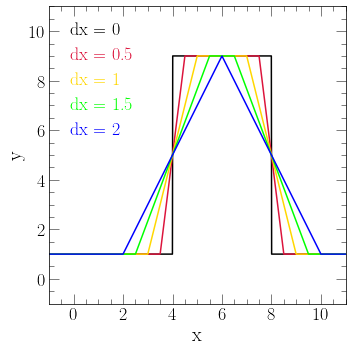

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 11])
ax.set_xticks(range(0, 12, 2))

dx = [0, 0.5, 1, 1.5, 2]
colors = ["black", "crimson", "gold", "lime", "blue"]
xvals = np.linspace(-1, 11, 1000)
for i in range(len(dx)):
    func = tophat_smooth(4, 8, 1, 9, dx[i])
    yvals = [func(_) for _ in xvals]
    ax.plot(xvals, yvals, c = named_colors()[colors[i]], label = "dx = %g" % (dx[i]))
    
kwargs = {
    "loc": mpl_loc("upper left"),
    "ncol": 1,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

In [90]:
# class gaussian:
    
#     def __init__(self, sigma, mean):
#         self.sigma = float(sigma)
#         self.mean = float(mean)
        
#     def __call__(self, x):
#         return 1 / (m.sqrt(2 * m.pi) * self.sigma) * m.exp(-(x - self.mean)**2 / (2 * self.sigma**2))
    
def convolve(xvals, yvals, sigma):
    dx = xvals[1] - xvals[0]
    _gaussian = gaussian(sigma, 0)
    _yvals = len(yvals) * [0.]
    for i in range(len(yvals)):
        for j in range(len(yvals)): _yvals[i] += yvals[j] * _gaussian(xvals[i] - xvals[j]) * dx
    return _yvals

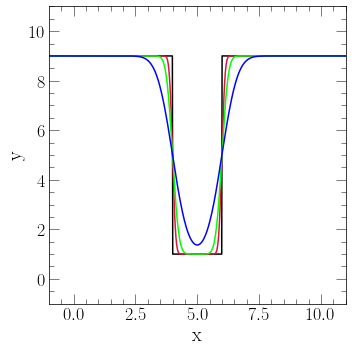

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 11])

def tophat(x):
    if 4 <= x <= 6:
        return 1
    else:
        return 9
    
xvals = np.linspace(-6, 16, 1500)
yvals = [tophat(_) for _ in xvals]
kwargs = {
    "c": named_colors()["black"],
    "label": "dx = 0"
}
ax.plot(xvals, yvals, **kwargs)

dx = [0.1, 0.2, 0.5]
colors = ["crimson", "lime", "blue"]
for i in range(len(dx)):
    _yvals = convolve(xvals, yvals, dx[i])
#     print(_yvals)
    kwargs["label"] = "dx = %g" % (dx[i])
    kwargs["c"] = named_colors()[colors[i]]
    ax.plot(xvals, _yvals, **kwargs)



# xvals = np.linspace(-5, 5, 1000)
# func = gaussian(1, 0)
# yvals = [func(_) for _ in xvals]
# ax.plot(xvals, yvals, c = named_colors()["black"])

plt.tight_layout()
plt.show()

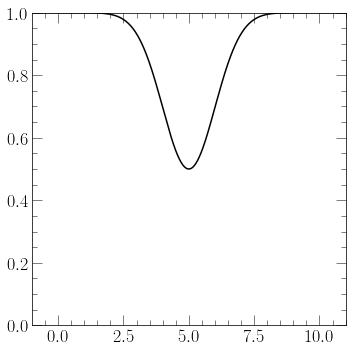

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-1, 11])
ax.set_ylim([0, 1])

# _gaussian = gaussian(0.5, 5)
def decrement(x, factor = 2, mean = 5, sigma=1):
    return 1 - (1 - 1 / factor) * m.exp(-(x - mean)**2 / (2 * sigma**2))

xvals = np.linspace(-1, 11, 1000)
yvals = [decrement(_) for _ in xvals]
ax.plot(xvals, yvals, c = named_colors()["black"])

plt.tight_layout()
plt.show()

In [3]:
class gaussian_tophat:
    
    def __init__(self, x1, x2, y0, sigma):
        self.x1 = float(x1)
        self.x2 = float(x2)
        self.y0 = float(y0)
        self.sigma = float(sigma)
        
    def __call__(self, x):
        return self.y0 / 2 * (
            m.erf((x - self.x1) / (self.sigma * m.sqrt(2))) -
            m.erf((x - self.x2) / (self.sigma * m.sqrt(2)))
        )

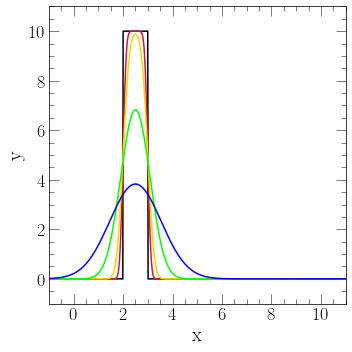

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 11])
ax.set_xticks(range(0, 12, 2))

def tophat(x):
    if 2 <= x <= 3:
        return 10
    else:
        return 0

xvals = np.linspace(-1, 11, 1000)
yvals = [tophat(_) for _ in xvals]
ax.plot(xvals, yvals, color = named_colors()["black"])

sigmas = [0.1, 0.2, 0.5, 1]
colors = ["crimson", "gold", "lime", "blue"]
for i in range(len(sigmas)):
    smoothed = gaussian_tophat(2, 3, 10, sigmas[i])
    yvals = [smoothed(_) for _ in xvals]
    ax.plot(xvals, yvals, c = named_colors()[colors[i]])

plt.tight_layout()
plt.show()

In [52]:
class linexp_tophat:
    
    def __init__(self, x1, x2, y0, tau):
        self.x1 = float(x1)
        self.x2 = float(x2)
        self.y0 = float(y0)
        self.tau = float(tau)
        
    def __call__(self, x):
        if x < self.x1:
            result = 0
        elif self.x1 <= x <= self.x2:
            result = self.y0 * (
                1 - m.exp(-(x - self.x1) / self.tau) +
                1. / self.tau * (x - self.x1) * m.exp(-(x - self.x1) / self.tau)
            )
        else:
            result = self.y0 * (
                m.exp(-(x - self.x2) / self.tau) -
                m.exp(-(x - self.x1) / self.tau) +
                1. / self.tau * (
                    (x - self.x2) * m.exp(-(x - self.x2) / self.tau) -
                    (x - self.x1) * m.exp(-(x - self.x1) / self.tau)
                )
            )
        return result

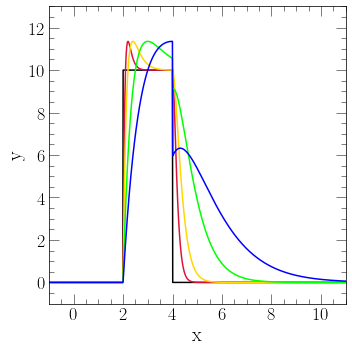

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 13])
ax.set_xticks(range(0, 12, 2))

def tophat(x):
    if 2 <= x <= 4:
        return 10
    else:
        return 0

xvals = np.linspace(-1, 11, 1000)
yvals = [tophat(_) for _ in xvals]
ax.plot(xvals, yvals, color = named_colors()["black"])

sigmas = [0.1, 0.2, 0.5, 1]
colors = ["crimson", "gold", "lime", "blue"]
for i in range(len(sigmas)):
#     if not i: continue
    smoothed = linexp_tophat(2, 4, 10, sigmas[i])
    yvals = [smoothed(_) for _ in xvals]
#     print(yvals)
    ax.plot(xvals, yvals, c = named_colors()[colors[i]])

plt.tight_layout()
plt.show()

In [66]:
class exp_tophat:
    
    def __init__(self, x1, x2, y0, tau):
        self.x1 = float(x1)
        self.x2 = float(x2)
        self.y0 = float(y0)
        self.tau = float(tau)
        
    def __call__(self, x):
        if x < self.x1:
            result = 0
        elif self.x1 <= x <= self.x2:
            result = self.y0 * (1 - m.exp(-(x - self.x1) / self.tau))
        else:
            result = self.y0 * (m.exp(-(x - self.x2) / self.tau) - m.exp(-(x - self.x1) / self.tau))
        return result

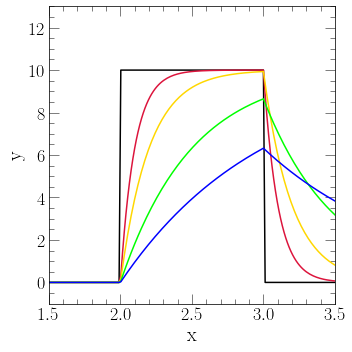

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([1.5, 3.5])
ax.set_ylim([-1, 13])
# ax.set_xticks(range(0, 12, 2))

def tophat(x):
    if 2 <= x <= 3:
        return 10
    else:
        return 0

xvals = np.linspace(-1, 11, 1000)
yvals = [tophat(_) for _ in xvals]
ax.plot(xvals, yvals, color = named_colors()["black"])

sigmas = [0.1, 0.2, 0.5, 1]
colors = ["crimson", "gold", "lime", "blue"]
for i in range(len(sigmas)):
    smoothed = exp_tophat(2, 3, 10, sigmas[i])
    yvals = [smoothed(_) for _ in xvals]
    ax.plot(xvals, yvals, c = named_colors()[colors[i]])

plt.tight_layout()
plt.show()

In [75]:
class linexp:
    
    def __init__(self, norm, tau, shift = 0):
        self.norm = float(norm)
        self.tau = float(tau)
        self.shift = float(shift)
        
    def __call__(self, x):
        if x < self.shift:
            return 0
        else:
            return self.norm * (x - self.shift) * m.exp(-(x - self.shift) / self.tau)

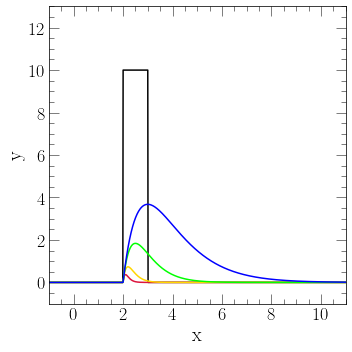

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 13])
ax.set_xticks(range(0, 12, 2))

def tophat(x):
    if 2 <= x <= 3:
        return 10
    else:
        return 0

xvals = np.linspace(-1, 11, 1000)
yvals = [tophat(_) for _ in xvals]
ax.plot(xvals, yvals, color = named_colors()["black"])

taus = [0.1, 0.2, 0.5, 1]
colors = ["crimson", "gold", "lime", "blue"]
for i in range(len(sigmas)):
    smoothed = linexp(10, taus[i], shift = 2)
    yvals = [smoothed(_) for _ in xvals]
    ax.plot(xvals, yvals, c = named_colors()[colors[i]])

plt.tight_layout()
plt.show()

In [82]:
class gaussian:
    
    def __init__(self, sigma = 0, mean = 0):
        self.sigma = float(sigma)
        self.mean = float(mean)
        
    def __call__(self, x):
        return 1 / (m.sqrt(2 * m.pi) * self.sigma) * m.exp(-(x - self.mean)**2 / (2 * self.sigma**2))
    
class exponential:
    
    def __init__(self, norm = 1, start = 0, tau = 1):
        self.norm = float(norm)
        self.start = float(start)
        self.tau = float(tau)
        
    def __call__(self, x):
        if x < self.start:
            return 0
        else:
            return self.norm * m.exp(-(x - self.start) / self.tau)
        
class expo_times_gaussian(gaussian, exponential):
    
    def __init__(self, sigma = 0, mean = 0, norm = 1, start = 0, tau = 1):
        gaussian.__init__(self, sigma = sigma, mean = mean)
        exponential.__init__(self, norm = norm, start = start, tau = tau)
        
    def __call__(self, x):
        return gaussian.__call__(self, x) * exponential.__call__(self, x)

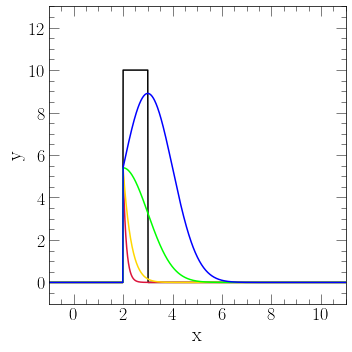

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 13])
ax.set_xticks(range(0, 12, 2))

def tophat(x):
    if 2 <= x <= 3:
        return 10
    else:
        return 0

xvals = np.linspace(-1, 11, 1000)
yvals = [tophat(_) for _ in xvals]
ax.plot(xvals, yvals, color = named_colors()["black"])

taus = [0.1, 0.2, 0.5, 1]
colors = ["crimson", "gold", "lime", "blue"]
for i in range(len(sigmas)):
    smoothed = expo_times_gaussian(sigma = 1, mean = 4, norm = 100, start = 2, tau = taus[i])
    yvals = [smoothed(_) for _ in xvals]
    ax.plot(xvals, yvals, c = named_colors()[colors[i]])

plt.tight_layout()
plt.show()

In [148]:
class gaussian:
    
    def __init__(self, norm = 1, sigma = 0, mean = 0):
        self.norm = float(norm)
        self.sigma = float(sigma)
        self.mean = float(mean)
        
    def __call__(self, x):
        return self.norm / (self.sigma * m.sqrt(2 * m.pi)) * m.exp(-(x - self.mean)**2 / (2 * self.sigma**2))

class skewed_gaussian(gaussian):
    
    def __init__(self, norm = 1, mean = 0, sigma = 1, skewness = 0):
        super().__init__(norm = norm, sigma = sigma, mean = mean)
        self.skewness = float(skewness)
        
    def __call__(self, x):
#         skew = (
#             1 + m.erf(self.skewness * (x - self.mean) / (self.sigma * m.sqrt(2)))
#         ) / (
#             1 + m.erf(-self.mean / (self.sigma * m.sqrt(2)))
#         )
        skew = 1 + m.erf(self.skewness * (x - self.mean) / (self.sigma * m.sqrt(2)))
        return skew * super().__call__(x)

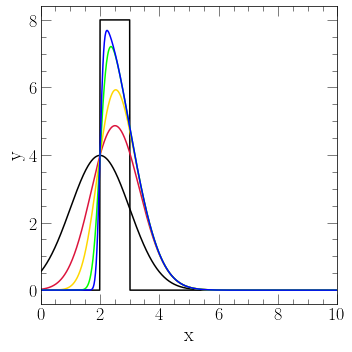

In [180]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([-1, 11])
ax.set_xlim([1.5, 3.5])
# ax.set_xlim([-5, 5])
# ax.set_ylim([-1, 13])
ax.set_xticks(range(0, 12, 2))

def tophat(x):
    if 2 <= x <= 3:
        return 8
    else:
        return 0

xvals = np.linspace(-1, 11, 1000)
yvals = [tophat(_) for _ in xvals]
ax.plot(xvals, yvals, color = named_colors()["black"])

skews = [0, 1, 2, 5, 10]
colors = ["black", "crimson", "gold", "lime", "blue"]
for i in range(len(skews)):
    smoothed = skewed_gaussian(norm = 10, sigma = 1, mean = 2, skewness = skews[i])
    yvals = [smoothed(_) for _ in xvals]
    ax.plot(xvals, yvals, c = named_colors()[colors[i]])

plt.tight_layout()
plt.show()

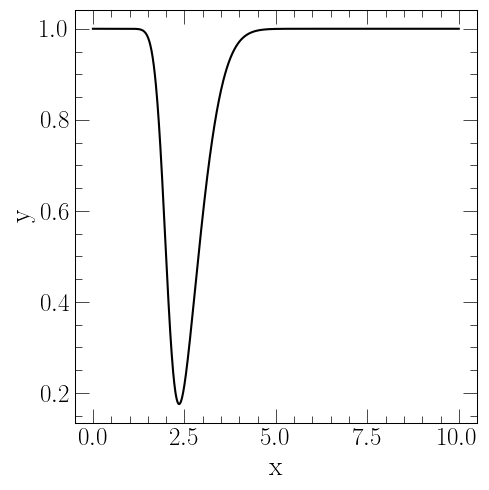

In [23]:
from src.simulations.models.utils import skewed_gaussian
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")

xvals = np.linspace(0, 10, 1000)
# skews = [0, 1, 5, 10]
# colors = ["black", "crimson", "lime", "blue"]
# for i in range(len(skews)):
#     kwargs = {'c': named_colors()[colors[i]]}
#     sg = skewed_gaussian(skew = skews[i])
#     yvals = [sg(_) for _ in xvals]
#     ax.plot(xvals, yvals, **kwargs)
sg = skewed_gaussian(mean = 2, amplitude = 0.5, std = 0.75, skew = 3)
yvals = [1 - sg(_) for _ in xvals]
ax.plot(xvals, yvals, c = named_colors()["black"])

plt.tight_layout()
plt.show()